<a href="https://colab.research.google.com/github/mlaricobar/solution-datathon-interbank-2020/blob/desarrollo/plus-one-solution/%5B02%5D%20EDA%20-%20Datasets%20-%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Config

### Installations 

In [ ]:
!pip install --upgrade confuse
!pip install --upgrade htmlmin
!pip install --upgrade phik
!pip install --upgrade tangled-up-in-unicode
!pip install --upgrade tqdm
!pip install --upgrade --force-reinstall visions==0.5.0
!pip install --upgrade imagehash
!pip install --upgrade --force-reinstall --no-deps pandas-profiling

Requirement already up-to-date: confuse in /usr/local/lib/python3.6/dist-packages (1.4.0)
Requirement already up-to-date: htmlmin in /usr/local/lib/python3.6/dist-packages (0.1.12)
Requirement already up-to-date: phik in /usr/local/lib/python3.6/dist-packages (0.10.0)
Requirement already up-to-date: tangled-up-in-unicode in /usr/local/lib/python3.6/dist-packages (0.0.6)
Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (4.54.1)
  Using cached https://files.pythonhosted.org/packages/26/e3/9416e94e767d59a86edcbcb8e1c8f42874d272c3b343676074879e9db0e0/visions-0.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/aa/cb45262569fcc047bf070b5de61813724d6726db83259222cd7b4c79821a/attrs-20.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4a/e2/e588ab9298d4989ce7fdb2b97d18aac878d99dbdc379a4476a09d9271b68/tangled_up_in_unicode-0.0.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/87/86/75

Requirement already up-to-date: imagehash in /usr/local/lib/python3.6/dist-packages (4.2.0)
  Using cached https://files.pythonhosted.org/packages/32/79/5d03ed1172e3e67a997a6a795bcdd2ab58f84851969d01a91455383795b6/pandas_profiling-2.9.0-py2.py3-none-any.whl
  Found existing installation: pandas-profiling 2.9.0
    Uninstalling pandas-profiling-2.9.0:
      Successfully uninstalled pandas-profiling-2.9.0


### Imports 

In [1]:
!pip install category_encoders

     |████████████████████████████████| 81kB 5.1MB/s 


In [2]:
from google.colab import drive, files

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil import relativedelta

In [3]:
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
%cd /gdrive/'My Drive'/Competencias/'[02] Interbank-2020'
!ls -lh '[00] Data'

/gdrive/My Drive/Competencias/[02] Interbank-2020
total 5.1G
-rw------- 1 root root 979M Jan 22 03:05 censo_test.csv
-rw------- 1 root root 748M Jan 22 03:05 censo_train.csv
-rw------- 1 root root  998 Jan 22 03:05 productos.csv
-rw------- 1 root root 1.7G Jan 22 03:05 rcc_test.csv
-rw------- 1 root root 1.4G Jan 22 03:06 rcc_train.csv
-rw------- 1 root root 3.3M Jan 22 03:06 sample_submission.csv
-rw------- 1 root root  30M Jan 22 03:06 se_test.csv
-rw------- 1 root root  28M Jan 22 03:06 se_train.csv
-rw------- 1 root root 122M Jan 22 03:06 sunat_test.csv
-rw------- 1 root root 106M Jan 22 03:06 sunat_train.csv
-rw------- 1 root root 3.0M Jan 22 03:06 y_train.csv


In [6]:
def optimizar_df(df):
  
  for col_ in df.select_dtypes(include=[int]).columns:
    df[col_] = pd.to_numeric(df[col_], downcast="unsigned")

  for col_ in df.select_dtypes(include=[float]).columns:
    df[col_] = pd.to_numeric(df[col_], downcast="float")
  
  return df

## Target

In [7]:
df_y_train = optimizar_df(pd.read_csv("[00] Data/y_train.csv"))
df_y_test = optimizar_df(pd.read_csv("[00] Data/sample_submission.csv"))

In [8]:
df_y_train.head(2)

,key_value,target
0,0,0
1,1,0


In [9]:
df_y_test.head(2)

,key_value,target
0,0,0
1,1,0


In [10]:
n_rows_train, n_rows_test = df_y_train.shape[0], df_y_test.shape[0], 
n_rows_total = n_rows_train + n_rows_test
print("Ratio de efectividad: {:.2f}%".format(100.0 * df_y_train["target"].mean()))

print("Cantidad de registros en la base de Entrenamiento: {0:,} ({1:.2f}%)".format(n_rows_train, 100.0*(n_rows_train/n_rows_total)))
print("Cantidad de registros en la base de Test: {0:,} ({1:.2f}%)".format(n_rows_test, 100.0*(n_rows_test/n_rows_total)))

Ratio de efectividad: 15.82%
Cantidad de registros en la base de Entrenamiento: 358,487 (47.47%)
Cantidad de registros en la base de Test: 396,666 (52.53%)


## Dataset Socio-económica

In [11]:
df_se_train = optimizar_df(pd.read_csv("[00] Data/se_train.csv"))
df_se_test = optimizar_df(pd.read_csv("[00] Data/se_test.csv"))

In [12]:
df_se_train.head(2)

,key_value,edad,sexo,est_cvl,sit_lab,cod_ocu,ctd_hijos,flg_sin_email,ctd_veh,cod_ubi,lgr_vot,prv,dto,rgn,tip_lvledu
0,0,-0.983651,1,4,2,22,0.0,1,0.0,-0.070167,17,47,687,4,0
1,1,0.000953,1,4,1,22,0.0,1,1.0,-0.738566,10,186,849,6,0


In [13]:
df_se_test.head(2)

,key_value,edad,sexo,est_cvl,sit_lab,cod_ocu,ctd_hijos,flg_sin_email,ctd_veh,cod_ubi,lgr_vot,prv,dto,rgn,tip_lvledu
0,0,1.137034,0,4,2,29,0.0,0,0.0,0.043777,18,111,772,3,0
1,1,-1.513823,0,4,1,22,0.0,1,0.0,0.618486,25,127,949,5,7


In [14]:
df_se_train_2 = df_y_train.merge(df_se_train, how="left", on=["key_value"])
df_se_test_2 = df_y_test.merge(df_se_test, how="left", on=["key_value"])

df_se_train_4_tree = df_se_train_2.copy()
df_se_test_4_tree = df_se_test_2.copy()

### Variables Numéricas

In [16]:
num_feat = ['edad', 'cod_ubi']

In [17]:
for col in num_feat:
  _, bins = pd.qcut(df_se_train_4_tree[col], q=10, retbins=True)
  bins = np.concatenate(([-np.inf], bins[1:-1], [np.inf]))
  
  df_se_train_4_tree["rango_{0}".format(col)] = pd.cut(df_se_train_4_tree[col], bins).astype(str)
  df_se_test_4_tree["rango_{0}".format(col)] = pd.cut(df_se_test_4_tree[col], bins).astype(str)

In [19]:
df_se_train_4_tree["ctd_veh"] = df_se_train_4_tree["ctd_veh"].fillna(-1).astype(int).astype(str)
df_se_train_4_tree.loc[df_se_train_4_tree["ctd_veh"].astype(int) >= 3, "ctd_veh"] = ">=3"

df_se_test_4_tree["ctd_veh"] = df_se_test_4_tree["ctd_veh"].fillna(-1).astype(int).astype(str)
df_se_test_4_tree.loc[df_se_test_4_tree["ctd_veh"].astype(int) >= 3, "ctd_veh"] = ">=3"

In [20]:
df_se_train_4_tree["ctd_hijos"] = df_se_train_4_tree["ctd_hijos"].fillna(-1).astype(int).astype(str)
df_se_train_4_tree.loc[df_se_train_4_tree["ctd_hijos"].astype(int) >= 3, "ctd_hijos"] = ">=3"

df_se_test_4_tree["ctd_hijos"] = df_se_test_4_tree["ctd_hijos"].fillna(-1).astype(int).astype(str)
df_se_test_4_tree.loc[df_se_test_4_tree["ctd_hijos"].astype(int) >= 3, "ctd_hijos"] = ">=3"

### Variables Categóricas

In [21]:
cat_feat = ["sexo", "est_cvl", "sit_lab", "cod_ocu", "flg_sin_email", "lgr_vot", "prv", "dto", "rgn", "tip_lvledu", "ctd_veh", "ctd_hijos", "rango_edad", "rango_cod_ubi"]

In [22]:
for col_cat in cat_feat:
  print("{0}".format(col_cat))
  print("\t", [c for c in df_se_train_4_tree[col_cat].unique() if c not in df_se_test_4_tree[col_cat].unique()])
  print("\t", [c for c in df_se_test_4_tree[col_cat].unique() if c not in df_se_train_4_tree[col_cat].unique()])
  print("\n")

sexo
	 [nan]
	 [nan]


est_cvl
	 [nan]
	 [nan]


sit_lab
	 [nan]
	 [nan]


cod_ocu
	 [nan]
	 [nan]


flg_sin_email
	 [nan]
	 [nan]


lgr_vot
	 [nan]
	 [nan]


prv
	 [nan]
	 [nan]


dto
	 [822.0, 1386.0, 861.0, 1555.0, nan, 1321.0, 852.0, 201.0, 786.0, 991.0, 1094.0, 841.0, 983.0, 1335.0, 1417.0, 729.0]
	 [414.0, nan, 1273.0, 1283.0, 5.0, 261.0, 1409.0, 1385.0, 1588.0, 1298.0, 157.0, 1055.0, 64.0, 547.0, 1523.0, 916.0, 150.0, 1276.0, 739.0, 1363.0, 1012.0]


rgn
	 [nan]
	 [nan]


tip_lvledu
	 [nan]
	 [nan]


ctd_veh
	 []
	 []


ctd_hijos
	 []
	 []


rango_edad
	 []
	 []


rango_cod_ubi
	 []
	 []




#### sexo

In [23]:
100*(df_se_train_2["sexo"].value_counts(normalize=True, dropna=False))

0.0    54.201408
1.0    44.731050
2.0     1.046621
NaN     0.016458
3.0     0.004463
Name: sexo, dtype: float64

In [24]:
100*(df_se_test_2["sexo"].value_counts(normalize=True, dropna=False))

0.0    55.663707
1.0    41.875533
2.0     2.442357
NaN     0.014370
3.0     0.004034
Name: sexo, dtype: float64

In [25]:
import category_encoders as ce

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
df_se_train_4_tree["rango_edad"].astype(str).value_counts(normalize=True, dropna=False)

(-inf, -1.211]      0.115806
(-0.681, -0.378]    0.110431
(0.152, 0.531]      0.109823
(-1.211, -0.908]    0.109170
(-0.151, 0.152]     0.100115
(0.91, 1.44]        0.095992
(0.531, 0.91]       0.093278
(1.44, inf]         0.089702
(-0.908, -0.681]    0.085716
(-0.378, -0.151]    0.079300
nan                 0.010667
Name: rango_edad, dtype: float64

In [27]:
def get_new_cat_features(cat_name, df_se_train_4_tree, df_se_test_4_tree):
  df_se_train_4_tree['{0}_filled'.format(cat_name)] = df_se_train_4_tree[cat_name].fillna(-99999)
  df_se_test_4_tree['{0}_filled'.format(cat_name)] = df_se_test_4_tree[cat_name].fillna(-99999)

  encoder_types = {"woe": ce.WOEEncoder(cols=['{0}_filled'.format(cat_name)]),
                    "looe": ce.LeaveOneOutEncoder(cols=['{0}_filled'.format(cat_name)]),                  
                    "stein": ce.JamesSteinEncoder(cols=['{0}_filled'.format(cat_name)]),
                    "te": ce.TargetEncoder(cols=['{0}_filled'.format(cat_name)])
                    }

  for enc_name, enc_obj in encoder_types.items():
    enc = enc_obj.fit(df_se_train_4_tree[['{0}_filled'.format(cat_name)]], df_se_train_4_tree["target"])
    df_se_train_4_tree["{0}_filled_{1}".format(cat_name, enc_name)] = enc.transform(df_se_train_4_tree["{0}_filled".format(cat_name)])
    df_se_test_4_tree["{0}_filled_{1}".format(cat_name, enc_name)] = enc.transform(df_se_test_4_tree["{0}_filled".format(cat_name)])

  df_agg_feat_tmp = df_se_train_4_tree.groupby("{0}_filled".format(cat_name), as_index=False).agg({"target": ["sum", "count", "std"]})
  df_agg_feat_tmp.columns = ["_".join(c) if c[-1] != "" else c[0] for c in df_agg_feat_tmp.columns]
  df_agg_feat_tmp["target_count_0"] = df_agg_feat_tmp.apply(lambda row: row["target_count"] - row["target_sum"], axis=1)
  df_agg_feat_tmp["target_diff_standar"] = df_agg_feat_tmp.apply(lambda row: (row["target_count_0"] - row["target_sum"]) / (row["target_count"]), axis=1)
  df_agg_feat_tmp = df_agg_feat_tmp[["{0}_filled".format(cat_name), "target_std", "target_diff_standar"]]
  std_dict = {d["{0}_filled".format(cat_name)]: d["target_std"] for d in df_agg_feat_tmp[["{0}_filled".format(cat_name), "target_std"]].to_dict(orient="records")}
  diff_dict = {d["{0}_filled".format(cat_name)]: d["target_diff_standar"] for d in df_agg_feat_tmp[["{0}_filled".format(cat_name), "target_diff_standar"]].to_dict(orient="records")}

  df_se_train_4_tree["{0}_filled_std".format(cat_name)] = df_se_train_4_tree["{0}_filled".format(cat_name)].map(std_dict)
  df_se_test_4_tree["{0}_filled_std".format(cat_name)] = df_se_test_4_tree["{0}_filled".format(cat_name)].map(std_dict)
  df_se_train_4_tree["{0}_filled_diff_standar".format(cat_name)] = df_se_train_4_tree["{0}_filled".format(cat_name)].map(diff_dict)
  df_se_test_4_tree["{0}_filled_diff_standar".format(cat_name)] = df_se_test_4_tree["{0}_filled".format(cat_name)].map(diff_dict)

  return df_se_train_4_tree, df_se_test_4_tree

In [28]:
for cat_col in cat_feat:
  print(cat_col)
  df_se_train_4_tree, df_se_test_4_tree = get_new_cat_features(cat_col, df_se_train_4_tree, df_se_test_4_tree)

sexo


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


est_cvl


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


sit_lab


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


cod_ocu


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


flg_sin_email


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


lgr_vot


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


prv


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


dto


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


rgn


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


tip_lvledu


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


ctd_veh


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


ctd_hijos


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


rango_edad


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


rango_cod_ubi


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [29]:
df_se_train_4_linear = df_se_train_4_tree[[c for c in df_se_train_4_tree.columns if ("_woe" in c) or (c in ["key_value", "target"])]]
df_se_test_4_linear = df_se_test_4_tree[[c for c in df_se_train_4_tree.columns if ("_woe" in c) or (c in ["key_value", "target"])]]

In [30]:
df_se_train_4_linear.corr().style.background_gradient(cmap='coolwarm')

,key_value,target,sexo_filled_woe,est_cvl_filled_woe,sit_lab_filled_woe,cod_ocu_filled_woe,flg_sin_email_filled_woe,lgr_vot_filled_woe,prv_filled_woe,dto_filled_woe,rgn_filled_woe,tip_lvledu_filled_woe,ctd_veh_filled_woe,ctd_hijos_filled_woe,rango_edad_filled_woe,rango_cod_ubi_filled_woe
key_value,1.000000,-0.005087,0.000027,0.022841,0.053456,0.022979,0.033248,-0.012618,-0.011905,-0.005129,-0.002319,0.044591,0.016776,0.012705,0.017869,-0.004752
target,-0.005087,1.000000,0.033134,0.046108,0.154406,0.046381,0.060621,0.084987,0.100905,0.126142,0.063178,0.078569,0.062121,0.019815,0.074683,0.061892
sexo_filled_woe,0.000027,0.033134,1.000000,-0.017518,0.114219,0.029911,0.048143,0.112912,0.122441,0.095590,0.079569,0.057971,0.113639,-0.038687,0.033987,0.082155
est_cvl_filled_woe,0.022841,0.046108,-0.017518,1.000000,0.164509,0.140835,0.137730,-0.016227,-0.003874,0.047672,0.071851,0.219381,0.224545,0.221457,0.402475,0.019607
sit_lab_filled_woe,0.053456,0.154406,0.114219,0.164509,1.000000,0.162810,0.288616,0.030348,0.080782,0.092243,0.168854,0.382711,0.127856,0.119388,0.181649,0.044639
cod_ocu_filled_woe,0.022979,0.046381,0.029911,0.140835,0.162810,1.000000,0.312201,-0.027432,-0.037603,0.025540,0.018587,0.427727,0.152578,0.104637,0.114539,0.009016
flg_sin_email_filled_woe,0.033248,0.060621,0.048143,0.137730,0.288616,0.312201,1.000000,-0.052605,-0.070978,0.009837,0.013620,0.544640,0.176251,0.135015,0.004890,0.003064
lgr_vot_filled_woe,-0.012618,0.084987,0.112912,-0.016227,0.030348,-0.027432,-0.052605,1.000000,0.748504,0.546973,0.590157,-0.039152,-0.017885,-0.023477,-0.035111,0.669790
prv_filled_woe,-0.011905,0.100905,0.122441,-0.003874,0.080782,-0.037603,-0.070978,0.748504,1.000000,0.722567,0.584446,-0.037195,-0.012374,-0.027317,0.004430,0.503863
dto_filled_woe,-0.005129,0.126142,0.095590,0.047672,0.092243,0.025540,0.009837,0.546973,0.722567,1.000000,0.455809,0.041521,0.057427,-0.005437,0.036423,0.397875


In [31]:
df_se_train_4_linear.to_csv('[01] Intermediate/ds_se_linear_train', index=False)
df_se_test_4_linear.to_csv('[01] Intermediate/ds_se_linear_test', index=False)

In [58]:
import math

In [72]:
def get_iv(df, cat_col):
  df_woe_tmp = pd.pivot_table(df, values="key_value", index="target", columns=cat_col, dropna=False, aggfunc="count")#.reset_index(drop=False)
  val_cols = df_woe_tmp.columns
  df_woe_tmp["total"] = df_woe_tmp[df_woe_tmp.columns].sum(axis=1)
  for c in val_cols:
    df_woe_tmp[c] = (df_woe_tmp[c]/df_woe_tmp["total"])
  del df_woe_tmp["total"]
  df_woe_tmp = df_woe_tmp.T
  df_woe_tmp["woe"] = df_woe_tmp.apply(lambda row: math.log(row[0] / row[1]), axis=1)
  df_woe_tmp["diff"] = df_woe_tmp.apply(lambda row: row[0] - row[1], axis=1)
  df_woe_tmp["woe_diff"] = df_woe_tmp.apply(lambda row: row["woe"] * row["diff"], axis=1)
  iv = df_woe_tmp["woe_diff"].sum()
  return iv

In [73]:
l = []
for cat_col in cat_feat:
  l.append({"cat_col": cat_col, "iv": get_iv(df_se_train_4_tree, cat_col)})

In [77]:
df_predictor = pd.DataFrame(l)
df_predictor["predictor_type"] = df_predictor["iv"].apply(lambda i: "01. useless" if i < 0.02 else "02. weak" if i < 0.1 else "03. medium" if i < 0.3 else "04. strong" if i < 0.5 else "05. too good")

In [80]:
df_predictor.sort_values(by=["predictor_type", "iv"], ascending=[False, False])

,cat_col,iv,predictor_type
2,sit_lab,0.157643,03. medium
7,dto,0.128482,03. medium
6,prv,0.083383,02. weak
5,lgr_vot,0.056879,02. weak
9,tip_lvledu,0.048754,02. weak
12,rango_edad,0.043497,02. weak
10,ctd_veh,0.034225,02. weak
13,rango_cod_ubi,0.030978,02. weak
8,rgn,0.030560,02. weak
4,flg_sin_email,0.028647,02. weak


## Dataset RCC

In [ ]:
df_rcc_train = optimizar_df(pd.read_csv("[00] Data/rcc_train.csv"))
df_rcc_test = optimizar_df(pd.read_csv("[00] Data/rcc_test.csv"))

In [ ]:
cat_feat = ["tipo_credito", "cod_instit_financiera", "PRODUCTO", "RIESGO_DIRECTO", "COD_CLASIFICACION_DEUDOR"]


In [ ]:
for col_cat in cat_feat:
  print("{0}".format(col_cat))
  print("\t", [c for c in df_rcc_train[col_cat].unique() if c not in df_rcc_test[col_cat].unique()])
  print("\t", [c for c in df_rcc_test[col_cat].unique() if c not in df_rcc_train[col_cat].unique()])
  print("\n")

tipo_credito
	 []
	 [7]


cod_instit_financiera
	 [58, 66, 102, 83, 103, 5, 81, 98, 67, 74, 31, 72, 87]
	 [nan]


PRODUCTO
	 [255]
	 [nan]


RIESGO_DIRECTO
	 []
	 []


COD_CLASIFICACION_DEUDOR
	 []
	 []




In [ ]:
#sorted(df_rcc_train["codmes"].unique())

In [ ]:
#sorted(df_rcc_test["codmes"].unique())

In [ ]:
df_rcc_train.head()

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
0,201711,4,0,12,33,-0.072601,6,-1,0
1,201711,4,0,12,33,-0.070608,7,-1,0
2,201711,4,0,12,61,-0.052054,5,-1,0
3,201711,4,0,11,32,-0.072456,8,1,0
4,201711,4,0,12,61,-0.057877,0,1,0


In [ ]:
df_rcc_train.loc[df_rcc_train["cod_instit_financiera"].isin([34,1,10,28,11,37])].groupby(["codmes", "cod_instit_financiera"], as_index=False).agg({"key_value": ["count", "nunique"]}).sort_values(by=["codmes",("key_value", "nunique")], ascending=[False, False]).head(7)

codmes cod_instit_financiera key_value        
                                     count nunique
69  201802                    28    312928   85924
67  201802                    10    297164   79889
70  201802                    34    296841   71661
66  201802                     1    273561   61666
71  201802                    37    215163   56809
68  201802                    11    213677   52330
64  201801                    34    270989   70592

In [ ]:
df_y_train["key_value"].nunique(), df_y_train.shape[0]

(358487, 358487)

In [ ]:
df_rcc_train_um = (df_rcc_train.loc[df_rcc_train["codmes"] == 201802, :].merge(df_y_train, how="left", on="key_value")
                                                                        .merge(df_productos, how="left", on="PRODUCTO")
                  )

In [ ]:
df_rcc_train_um.loc[(df_rcc_train_um["target"] == 1) & (df_rcc_train_um["DES_PRODUCTO"].isin(["PRESTAMO PERSONAL", "PRESTAMOS MICRO EMPRESA"]))].sort_values(by=["key_value"]).head(15)

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,target,DES_PRODUCTO
68877,201802,4,80,12,61,-0.069141,0,2,3,1,PRESTAMO PERSONAL
68887,201802,4,0,12,61,-0.061639,0,1,3,1,PRESTAMO PERSONAL
68886,201802,4,1,12,33,-0.046355,0,1,0,1,PRESTAMO PERSONAL
1429752,201802,9,0,10,18,-0.050498,4,1,0,1,PRESTAMOS MICRO EMPRESA
269453,201802,14,0,12,61,-0.053633,0,1,0,1,PRESTAMO PERSONAL
1439959,201802,22,0,10,55,-0.047766,4,1,0,1,PRESTAMOS MICRO EMPRESA
1439968,201802,23,0,12,10,-0.031888,0,1,0,1,PRESTAMO PERSONAL
101174,201802,30,0,12,28,-0.038819,0,1,0,1,PRESTAMO PERSONAL
101171,201802,30,0,11,46,-0.068201,0,1,0,1,PRESTAMO PERSONAL
101167,201802,30,0,10,55,-0.044899,4,1,0,1,PRESTAMOS MICRO EMPRESA


In [ ]:
df_se_train.loc[df_se_train["key_value"] == 4]

,key_value,edad,sexo,est_cvl,sit_lab,cod_ocu,ctd_hijos,flg_sin_email,ctd_veh,cod_ubi,lgr_vot,prv,dto,rgn,tip_lvledu
4,4,-1.438084,0,4,1,22,0.0,1,0.0,0.043424,18,111,391,3,0


In [ ]:
df_se_test.loc[df_se_test["key_value"] == 4]

,key_value,edad,sexo,est_cvl,sit_lab,cod_ocu,ctd_hijos,flg_sin_email,ctd_veh,cod_ubi,lgr_vot,prv,dto,rgn,tip_lvledu
4,4,-1.135129,0,4,1,21,0.0,1,0.0,0.952782,28,175,1487,6,0


In [ ]:
df_se_test.loc[df_se_test["edad"] == -1.135129]

,key_value,edad,sexo,est_cvl,sit_lab,cod_ocu,ctd_hijos,flg_sin_email,ctd_veh,cod_ubi,lgr_vot,prv,dto,rgn,tip_lvledu


In [ ]:
df_rcc_test.loc[(df_rcc_test["codmes"] == 201803) & (df_rcc_test["key_value"] == 30), :]

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
24681444,201803,30,0,11,1.0,-0.059198,8.0,1,0
24681445,201803,30,0,12,1.0,-0.072881,NaN,-1,0
24681446,201803,30,0,12,1.0,-0.072310,1.0,-1,0
24681447,201803,30,0,11,1.0,-0.071985,1.0,-1,0
24681448,201803,30,0,11,1.0,0.020045,2.0,-1,0
24681449,201803,30,0,11,11.0,-0.041540,3.0,-1,0
24681450,201803,30,0,11,11.0,-0.041540,2.0,-1,0
24681451,201803,30,0,12,1.0,-0.044776,0.0,1,0
24681452,201803,30,0,11,1.0,0.006340,3.0,-1,0


In [ ]:
df_rcc_train_um.loc[(df_rcc_train_um["target"] == 1) & (df_rcc_train_um["DES_PRODUCTO"].isin(["PRESTAMO PERSONAL", "PRESTAMOS MICRO EMPRESA"])), "key_value"].nunique()

48172

In [ ]:
df_rcc_train_um.loc[(df_rcc_train_um["target"] == 1) & (df_rcc_train_um["DES_PRODUCTO"].isin(["PRESTAMO PERSONAL", "PRESTAMOS MICRO EMPRESA"])), :].groupby("cod_instit_financiera", as_index=False).agg({"key_value": "nunique"}).sort_values(by="key_value", ascending=False)

,cod_instit_financiera,key_value
42,55,16112
22,28,10215
47,61,7135
7,10,6442
25,33,4855
...,...,...
51,68,2
39,49,1
52,70,1
54,79,1


In [ ]:
48172

In [ ]:
34, 1, 10, 28, 11, 37

In [ ]:
df_rcc_train_um.loc[(df_rcc_train_um["target"] == 1)].groupby("DES_PRODUCTO").agg({"key_value": "nunique"}).sort_values(by="key_value", ascending=False)

,key_value
DES_PRODUCTO,
RENDIMIENTOS DEVENGADOS,52411
PRESTAMO PERSONAL,29983
PRESTAMOS MICRO EMPRESA,29090
PROVISIONES,27043
LINEA TOTAL TC,26379
LINEA TC NO UTILIZADA,23762
TARJETAS COMPRAS,22390
GARANTIA NO PREFERIDA - AVALES FIANZAS,22261
OTRAS GARANTIAS NO PREFERIDAS,21509


In [ ]:
#df_rcc_train_um.groupby("DES_PRODUCTO").agg({"key_value": "nunique", "target": "mean"}).sort_values(by="key_value", ascending=False)

In [ ]:
df_rcc_train.loc[df_rcc_train["codmes"] == "201802"]

In [ ]:
df_rcc_test.loc[df_rcc_test["cod_instit_financiera"].isin([34,1,10,28,11,37])].groupby(["codmes", "cod_instit_financiera"], as_index=False).agg({"key_value": ["count", "nunique"]}).sort_values(by=["codmes",("key_value", "nunique")], ascending=[False, False]).head(7)

codmes cod_instit_financiera key_value        
                                     count nunique
69  201902                  28.0    317915   86295
67  201902                  10.0    304653   81187
70  201902                  34.0    349482   76169
66  201902                   1.0    320257   69214
71  201902                  37.0    255602   67246
68  201902                  11.0    238714   57714
64  201901                  34.0    327874   74382

In [ ]:
df_rcc_test.loc[df_rcc_test["codmes"] == 201902, "key_value"].nunique()

396666

In [ ]:
df_y_test["key_value"].nunique()

396666

In [ ]:
df_rcc_test.groupby("codmes").agg({"key_value": "count"})

,key_value
codmes,
201803,2572175
201804,2610643
201805,2671249
201806,2725859
201807,2760481
201808,2803200
201809,2850795
201810,2873164
201811,2927965


In [ ]:
df_rcc_test.loc[df_rcc_test["codmes"] == 201803]

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
148465,201803,43580,0,11,34.0,-0.059892,8.0,1,0
148466,201803,43580,0,11,37.0,-0.070250,11.0,1,0
148467,201803,43580,0,11,3.0,-0.003951,11.0,1,0
148468,201803,43580,0,11,3.0,-0.067596,8.0,1,0
148469,201803,43580,0,11,37.0,-0.051281,8.0,1,0
...,...,...,...,...,...,...,...,...,...
34334468,201803,384528,0,10,57.0,0.570179,4.0,1,0
34334469,201803,384528,0,10,17.0,0.083288,4.0,1,0
34334605,201803,381511,0,12,8.0,-0.072545,6.0,-1,0
34334606,201803,381511,0,12,8.0,-0.072679,1.0,-1,0


In [ ]:
df_se_test.head()

,key_value,edad,sexo,est_cvl,sit_lab,cod_ocu,ctd_hijos,flg_sin_email,ctd_veh,cod_ubi,lgr_vot,prv,dto,rgn,tip_lvledu
0,0,-0.983651,1,4,2,22,0.0,1,0.0,-0.070167,17,47,687,4,0
1,1,0.000953,1,4,1,22,0.0,1,1.0,-0.738566,10,186,849,6,0
2,2,0.531124,0,4,1,22,0.0,1,0.0,-0.297248,15,84,1405,1,7
3,3,-1.135129,0,4,1,22,0.0,1,0.0,-1.203435,4,9,977,6,7
4,4,-1.438084,0,4,1,22,0.0,1,0.0,0.043424,18,111,391,3,0


In [ ]:
df_se_train.head()

,key_value,edad,sexo,est_cvl,sit_lab,cod_ocu,ctd_hijos,flg_sin_email,ctd_veh,cod_ubi,lgr_vot,prv,dto,rgn,tip_lvledu
0,0,-0.983651,1,4,2,22,0.0,1,0.0,-0.070167,17,47,687,4,0
1,1,0.000953,1,4,1,22,0.0,1,1.0,-0.738566,10,186,849,6,0
2,2,0.531124,0,4,1,22,0.0,1,0.0,-0.297248,15,84,1405,1,7
3,3,-1.135129,0,4,1,22,0.0,1,0.0,-1.203435,4,9,977,6,7
4,4,-1.438084,0,4,1,22,0.0,1,0.0,0.043424,18,111,391,3,0


In [ ]:
df_rcc_train["saldo"] = df_rcc_train["saldo"] + 1
df_rcc_test["saldo"] = df_rcc_test["saldo"] + 1

In [ ]:
df_tmp.merge(df_rcc_train, how="left", on=["key_value"])["key_value"].nunique()

59

In [ ]:
df_tmp["key_value"].unique()

array([ 19746,  21193,  23473,  38585,  60175,  62839,  73272,  82011,
        91073,  94429,  96812, 108000, 109865, 110969, 119255, 135104,
       137357, 139577, 144120, 144344, 154737, 156844, 158561, 160882,
       175112, 177021, 184458, 185292, 189396, 202517, 202910, 207791,
       216908, 223633, 228313, 233956, 234932, 235455, 236694, 245129,
       247126, 250645, 250745, 258691, 262342, 263528, 266535, 280805,
       284420, 288153, 300692, 308139, 319317, 325483, 327808, 330046,
       341515, 343377, 356895], dtype=uint32)

### Experimentando

In [ ]:
df_rcc_train = df_rcc_train.merge(df_y_train, how="left", on="key_value")

In [ ]:
df_rcc_train.head()

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,target
0,201711,4,0,12,33,0.927399,6,-1,0,1
1,201711,4,0,12,33,0.929392,7,-1,0,1
2,201711,4,0,12,61,0.947946,5,-1,0,1
3,201711,4,0,11,32,0.927544,8,1,0,1
4,201711,4,0,12,61,0.942123,0,1,0,1


In [ ]:
df_agg_tmp = df_rcc_train.groupby("key_value", as_index=False).agg({"codmes": "nunique", "target": "mean"})

In [ ]:
df_agg_tmp.sort_values(by=["target", "codmes"], ascending=[False, False]).head(5)

,key_value,codmes,target
14,14,12,1
22,22,12,1
30,30,12,1
32,32,12,1
34,34,12,1


#### Comportamiento a nivel de productos

In [ ]:
df_rcc_train.loc[df_rcc_train["key_value"] == 34].sort_values(by=["codmes", "cod_instit_financiera", "PRODUCTO"], ascending=False).head(5)

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,target
592182,201802,34,0,11,37,0.944329,8,1,0,1
592176,201802,34,0,11,37,0.944329,2,-1,0,1
592171,201802,34,0,11,32,1.040189,13,1,0,1
592174,201802,34,0,11,32,0.938305,3,-1,0,1
592175,201802,34,0,11,32,1.051386,2,-1,0,1


In [ ]:
df_rcc_train.loc[df_rcc_train["condicion"] >= 960, "target"].mean()

0.6064852523756633

In [ ]:
def diff_months(codmes_ini, codmes_fin):
  try:
    r = relativedelta.relativedelta(datetime.strptime(str(int(codmes_fin)), '%Y%m'), datetime.strptime(str(int(codmes_ini)), '%Y%m'))
    return r.years*12 + r.months
  except:
    return None

def div_func(numer, denom):
    if denom != 0:
        return numer/denom
    else:
        return None

###### A nivel de un usuario

In [ ]:
## Filtrar solo las deudas de la RCC de un usuario
df_rcc_train_filtered = df_rcc_train.loc[df_rcc_train["key_value"] == 34].copy()

## Crear el código único del producto
df_rcc_train_filtered["cod_producto_unico"] = df_rcc_train_filtered.apply(lambda row: "{0}_{1}_{2}".format(str(int(row["cod_instit_financiera"])).zfill(2), str(int(row["PRODUCTO"])).zfill(2), str(int(row["tipo_credito"])).zfill(2)), axis=1)
## Crear el código único del producto
df_rcc_train_filtered_agg = df_rcc_train_filtered.groupby(["key_value", "cod_producto_unico", "codmes"], as_index=False).agg({"saldo": "sum", "condicion": "sum"}).sort_values(by=["cod_producto_unico", "codmes"], ascending=[True, True]).tail(30)
## Crear los campos previos de codmes, saldo y condicion
for col in ["codmes", "saldo", "condicion"]:
  df_rcc_train_filtered_agg["prev_{0}".format(col)] = df_rcc_train_filtered_agg.groupby(["key_value", "cod_producto_unico"])[col].shift(1)

## Medir la diferencia entre el codmes, saldo y condicion actual contra el previo 
df_rcc_train_filtered_agg["diff_prev_codmes"] = df_rcc_train_filtered_agg.apply(lambda row: diff_months(row["prev_codmes"], row["codmes"]), axis=1)
df_rcc_train_filtered_agg["diff_prev_saldo"] = df_rcc_train_filtered_agg.apply(lambda row: (row["saldo"] - row["prev_saldo"]), axis=1)
df_rcc_train_filtered_agg["diff_prev_condicion"] = df_rcc_train_filtered_agg.apply(lambda row: (row["condicion"] - row["prev_condicion"]), axis=1)

## Calcular el valor absoluto de las diferencias
df_rcc_train_filtered_agg["abs_diff_prev_saldo"] = abs(df_rcc_train_filtered_agg["diff_prev_saldo"])
df_rcc_train_filtered_agg["abs_diff_prev_condicion"] = abs(df_rcc_train_filtered_agg["diff_prev_condicion"])

## Flags que indican si hubo un incremento, decremento o ningun cambio en las variables saldo y condicion
for col_ in ["saldo", "condicion"]:
  df_rcc_train_filtered_agg.loc[pd.notnull(df_rcc_train_filtered_agg["diff_prev_{0}".format(col_)]), "incr_flag_{0}".format(col_)] = df_rcc_train_filtered_agg.loc[pd.notnull(df_rcc_train_filtered_agg["diff_prev_{0}".format(col_)]), "diff_prev_{0}".format(col_)].apply(lambda c: 1 if c > 0 else 0)
  df_rcc_train_filtered_agg.loc[pd.notnull(df_rcc_train_filtered_agg["diff_prev_{0}".format(col_)]), "decr_flag_{0}".format(col_)] = df_rcc_train_filtered_agg.loc[pd.notnull(df_rcc_train_filtered_agg["diff_prev_{0}".format(col_)]), "diff_prev_{0}".format(col_)].apply(lambda c: 1 if c < 0 else 0)
  df_rcc_train_filtered_agg.loc[pd.notnull(df_rcc_train_filtered_agg["diff_prev_{0}".format(col_)]), "same_flag_{0}".format(col_)] = df_rcc_train_filtered_agg.loc[pd.notnull(df_rcc_train_filtered_agg["diff_prev_{0}".format(col_)]), "diff_prev_{0}".format(col_)].apply(lambda c: 1 if c == 0 else 0)

df_rcc_train_filtered_agg_2 = df_rcc_train_filtered_agg.groupby(["key_value", "cod_producto_unico"], as_index=False).agg({
                                                                                              "codmes": ["first", "last"],
                                                                                              "saldo": ["mean", "sum", "count", "last", "first", "max", "min"],
                                                                                              "condicion": ["mean", "sum", "last", "first", "max", "min"],
                                                                                              "diff_prev_codmes": ["mean", "sum"],
                                                                                              "diff_prev_saldo": ["mean", "sum", "std"],
                                                                                              "diff_prev_condicion": ["mean", "sum", "std"],
                                                                                              "abs_diff_prev_saldo": ["mean", "sum", "std"],
                                                                                              "abs_diff_prev_condicion": ["mean", "sum", "std"],
                                                                                              "incr_flag_saldo": ["mean", "sum"],
                                                                                              "decr_flag_saldo": ["mean", "sum"],
                                                                                              "same_flag_saldo": ["mean", "sum"],
                                                                                              "incr_flag_condicion": ["mean", "sum"],
                                                                                              "decr_flag_condicion": ["mean", "sum"],
                                                                                              "same_flag_condicion": ["mean", "sum"]
                                                                                            }
                                                                                           )
df_rcc_train_filtered_agg_2.columns = ["_".join(c) if c[-1] != "" else c[0] for c in df_rcc_train_filtered_agg_2.columns]

df_rcc_train_filtered_agg_2["recency"] = df_rcc_train_filtered_agg_2.apply(lambda row: diff_months(row["codmes_last"], 201803), axis=1)
df_rcc_train_filtered_agg_2["long_recency"] = df_rcc_train_filtered_agg_2.apply(lambda row: diff_months(row["codmes_first"], 201803), axis=1)
df_rcc_train_filtered_agg_2["diff_months"] = df_rcc_train_filtered_agg_2.apply(lambda row: diff_months(row["codmes_first"], row["codmes_last"]), axis=1)

df_rcc_train_filtered_agg_2["ratio_saldo_last_over_first"] = df_rcc_train_filtered_agg_2.apply(lambda row: div_func(row["saldo_last"], row["saldo_first"]), axis=1)
df_rcc_train_filtered_agg_2["ratio_diff_saldo_last_first_over_count"] = df_rcc_train_filtered_agg_2.apply(lambda row: div_func((row["saldo_last"] - row["saldo_first"]), row["saldo_count"]), axis=1)
df_rcc_train_filtered_agg_2["ratio_diff_saldo_max_min_over_count"] = df_rcc_train_filtered_agg_2.apply(lambda row: div_func((row["saldo_max"] - row["saldo_min"]), row["saldo_count"]), axis=1)
df_rcc_train_filtered_agg_2["ratio_diff_saldo_last_first_over_diff_months"] = df_rcc_train_filtered_agg_2.apply(lambda row: div_func((row["saldo_last"] - row["saldo_first"]), row["diff_months"]), axis=1)
df_rcc_train_filtered_agg_2["ratio_diff_saldo_max_min_over_diff_months"] = df_rcc_train_filtered_agg_2.apply(lambda row: div_func((row["saldo_max"] - row["saldo_min"]), row["diff_months"]), axis=1)
df_rcc_train_filtered_agg_2["ratio_diff_saldo_last_first_over_diff_prev_saldo_sum"] = df_rcc_train_filtered_agg_2.apply(lambda row: div_func((row["saldo_last"] - row["saldo_first"]), row["abs_diff_prev_saldo_sum"]), axis=1)
df_rcc_train_filtered_agg_2["ratio_diff_saldo_last_first_over_diff_prev_saldo_mean"] = df_rcc_train_filtered_agg_2.apply(lambda row: div_func((row["saldo_last"] - row["saldo_first"]), row["abs_diff_prev_saldo_mean"]), axis=1)

df_rcc_train_filtered_agg_2.drop(columns=["codmes_first", "codmes_last"], inplace=True)

agg_dict = {c: ["mean"] if c not in ["cod_producto_unico"] else ["nunique"] for c in df_rcc_train_filtered_agg_2.columns if c not in ["key_value"]}

df_rcc_train_filtered_agg_3 = df_rcc_train_filtered_agg_2.groupby(["key_value"], as_index=False).agg(agg_dict)
df_rcc_train_filtered_agg_3.columns = ["_".join(c) if c[-1] != "" else c[0] for c in df_rcc_train_filtered_agg_3.columns]

In [ ]:
df_rcc_train_filtered_agg_3.head()

,key_value,cod_producto_unico_nunique,saldo_mean_mean,saldo_sum_mean,saldo_count_mean,saldo_last_mean,saldo_first_mean,saldo_max_mean,saldo_min_mean,condicion_mean_mean,condicion_sum_mean,condicion_last_mean,condicion_first_mean,condicion_max_mean,condicion_min_mean,diff_prev_codmes_mean_mean,diff_prev_codmes_sum_mean,diff_prev_saldo_mean_mean,diff_prev_saldo_sum_mean,diff_prev_saldo_std_mean,diff_prev_condicion_mean_mean,diff_prev_condicion_sum_mean,diff_prev_condicion_std_mean,abs_diff_prev_saldo_mean_mean,abs_diff_prev_saldo_sum_mean,abs_diff_prev_saldo_std_mean,abs_diff_prev_condicion_mean_mean,abs_diff_prev_condicion_sum_mean,abs_diff_prev_condicion_std_mean,incr_flag_saldo_mean_mean,incr_flag_saldo_sum_mean,decr_flag_saldo_mean_mean,decr_flag_saldo_sum_mean,same_flag_saldo_mean_mean,same_flag_saldo_sum_mean,incr_flag_condicion_mean_mean,incr_flag_condicion_sum_mean,decr_flag_condicion_mean_mean,decr_flag_condicion_sum_mean,same_flag_condicion_mean_mean,same_flag_condicion_sum_mean,recency_mean,long_recency_mean,diff_months_mean,ratio_saldo_last_over_first_mean,ratio_diff_saldo_last_first_over_count_mean,ratio_diff_saldo_max_min_over_count_mean,ratio_diff_saldo_last_first_over_diff_months_mean,ratio_diff_saldo_max_min_over_diff_months_mean,ratio_diff_saldo_last_first_over_diff_prev_saldo_sum_mean,ratio_diff_saldo_last_first_over_diff_prev_saldo_mean_mean
0,34,4,0.935515,7.022359,7.5,0.938982,0.934439,0.940253,0.933781,0,0,0,0,0,0,1.074074,7.0,0.000715,0.004543,0.003024,0.0,0.0,0.0,0.001875,0.012924,0.002443,0.0,0.0,0.0,0.413757,2.75,0.314815,2.25,0.271429,1.5,0.0,0.0,0.0,0.0,1.0,6.5,1.5,8.5,7,1.004878,0.000479,0.000659,0.000614,0.000865,0.514072,3.950491


In [ ]:
df_rcc_train_filtered_agg_3.shape

(1, 51)

###### A nivel de todos los usuarios

In [ ]:
## Crear el código único del producto
df_rcc_train["cod_producto_unico"] = df_rcc_train.apply(lambda row: "{0}_{1}_{2}".format(str(int(row["cod_instit_financiera"])).zfill(2), str(int(row["PRODUCTO"])).zfill(2), str(int(row["tipo_credito"])).zfill(2)), axis=1)
## Crear el código único del producto
df_rcc_train_agg = df_rcc_train.groupby(["key_value", "cod_producto_unico", "codmes"], as_index=False).agg({"saldo": "sum", "condicion": "sum"}).sort_values(by=["cod_producto_unico", "codmes"], ascending=[True, True]).tail(30)
## Crear los campos previos de codmes, saldo y condicion
for col in ["codmes", "saldo", "condicion"]:
  df_rcc_train_agg["prev_{0}".format(col)] = df_rcc_train_agg.groupby(["key_value", "cod_producto_unico"])[col].shift(1)

## Medir la diferencia entre el codmes, saldo y condicion actual contra el previo 
df_rcc_train_agg["diff_prev_codmes"] = df_rcc_train_agg.apply(lambda row: diff_months(row["prev_codmes"], row["codmes"]), axis=1)
df_rcc_train_agg["diff_prev_saldo"] = df_rcc_train_agg.apply(lambda row: (row["saldo"] - row["prev_saldo"]), axis=1)
df_rcc_train_agg["diff_prev_condicion"] = df_rcc_train_agg.apply(lambda row: (row["condicion"] - row["prev_condicion"]), axis=1)

## Calcular el valor absoluto de las diferencias
df_rcc_train_agg["abs_diff_prev_saldo"] = abs(df_rcc_train_agg["diff_prev_saldo"])
df_rcc_train_agg["abs_diff_prev_condicion"] = abs(df_rcc_train_agg["diff_prev_condicion"])

## Flags que indican si hubo un incremento, decremento o ningun cambio en las variables saldo y condicion
for col_ in ["saldo", "condicion"]:
  df_rcc_train_agg.loc[pd.notnull(df_rcc_train_agg["diff_prev_{0}".format(col_)]), "incr_flag_{0}".format(col_)] = df_rcc_train_agg.loc[pd.notnull(df_rcc_train_agg["diff_prev_{0}".format(col_)]), "diff_prev_{0}".format(col_)].apply(lambda c: 1 if c > 0 else 0)
  df_rcc_train_agg.loc[pd.notnull(df_rcc_train_agg["diff_prev_{0}".format(col_)]), "decr_flag_{0}".format(col_)] = df_rcc_train_agg.loc[pd.notnull(df_rcc_train_agg["diff_prev_{0}".format(col_)]), "diff_prev_{0}".format(col_)].apply(lambda c: 1 if c < 0 else 0)
  df_rcc_train_agg.loc[pd.notnull(df_rcc_train_agg["diff_prev_{0}".format(col_)]), "same_flag_{0}".format(col_)] = df_rcc_train_agg.loc[pd.notnull(df_rcc_train_agg["diff_prev_{0}".format(col_)]), "diff_prev_{0}".format(col_)].apply(lambda c: 1 if c == 0 else 0)

df_rcc_train_agg_2 = df_rcc_train_agg.groupby(["key_value", "cod_producto_unico"], as_index=False).agg({
                                                                                              "codmes": ["first", "last"],
                                                                                              "saldo": ["mean", "sum", "count", "last", "first", "max", "min"],
                                                                                              "condicion": ["mean", "sum", "last", "first", "max", "min"],
                                                                                              "diff_prev_codmes": ["mean", "sum"],
                                                                                              "diff_prev_saldo": ["mean", "sum", "std"],
                                                                                              "diff_prev_condicion": ["mean", "sum", "std"],
                                                                                              "abs_diff_prev_saldo": ["mean", "sum", "std"],
                                                                                              "abs_diff_prev_condicion": ["mean", "sum", "std"],
                                                                                              "incr_flag_saldo": ["mean", "sum"],
                                                                                              "decr_flag_saldo": ["mean", "sum"],
                                                                                              "same_flag_saldo": ["mean", "sum"],
                                                                                              "incr_flag_condicion": ["mean", "sum"],
                                                                                              "decr_flag_condicion": ["mean", "sum"],
                                                                                              "same_flag_condicion": ["mean", "sum"]
                                                                                            }
                                                                                           )
df_rcc_train_agg_2.columns = ["_".join(c) if c[-1] != "" else c[0] for c in df_rcc_train_agg_2.columns]

df_rcc_train_agg_2["recency"] = df_rcc_train_agg_2.apply(lambda row: diff_months(row["codmes_last"], 201803), axis=1)
df_rcc_train_agg_2["long_recency"] = df_rcc_train_agg_2.apply(lambda row: diff_months(row["codmes_first"], 201803), axis=1)
df_rcc_train_agg_2["diff_months"] = df_rcc_train_agg_2.apply(lambda row: diff_months(row["codmes_first"], row["codmes_last"]), axis=1)

df_rcc_train_agg_2["ratio_saldo_last_over_first"] = df_rcc_train_agg_2.apply(lambda row: div_func(row["saldo_last"], row["saldo_first"]), axis=1)
df_rcc_train_agg_2["ratio_diff_saldo_last_first_over_count"] = df_rcc_train_agg_2.apply(lambda row: div_func((row["saldo_last"] - row["saldo_first"]), row["saldo_count"]), axis=1)
df_rcc_train_agg_2["ratio_diff_saldo_max_min_over_count"] = df_rcc_train_agg_2.apply(lambda row: div_func((row["saldo_max"] - row["saldo_min"]), row["saldo_count"]), axis=1)
df_rcc_train_agg_2["ratio_diff_saldo_last_first_over_diff_months"] = df_rcc_train_agg_2.apply(lambda row: div_func((row["saldo_last"] - row["saldo_first"]), row["diff_months"]), axis=1)
df_rcc_train_agg_2["ratio_diff_saldo_max_min_over_diff_months"] = df_rcc_train_agg_2.apply(lambda row: div_func((row["saldo_max"] - row["saldo_min"]), row["diff_months"]), axis=1)
df_rcc_train_agg_2["ratio_diff_saldo_last_first_over_diff_prev_saldo_sum"] = df_rcc_train_agg_2.apply(lambda row: div_func((row["saldo_last"] - row["saldo_first"]), row["abs_diff_prev_saldo_sum"]), axis=1)
df_rcc_train_agg_2["ratio_diff_saldo_last_first_over_diff_prev_saldo_mean"] = df_rcc_train_agg_2.apply(lambda row: div_func((row["saldo_last"] - row["saldo_first"]), row["abs_diff_prev_saldo_mean"]), axis=1)

df_rcc_train_agg_2.drop(columns=["codmes_first", "codmes_last"], inplace=True)

agg_dict = {c: ["mean"] if c not in ["cod_producto_unico"] else ["nunique"] for c in df_rcc_train_agg_2.columns if c not in ["key_value"]}

df_rcc_train_agg_3 = df_rcc_train_agg_2.groupby(["key_value"], as_index=False).agg(agg_dict)
df_rcc_train_agg_3.columns = ["_".join(c) if c[-1] != "" else c[0] for c in df_rcc_train_agg_3.columns]

In [ ]:
df_rcc_train_agg_3.head()

#### Comportamiento a nivel de categorías

In [ ]:
df_rcc_train_filtered["condicion_cat"] = df_rcc_train_filtered["condicion"].apply(lambda c: 0 if c == 0 else "00_03" if c < 90 else  "03_06" if c < 180 else "06_12" if c < 365 else "12-32" if c < 960 else ">32")

In [ ]:
cat_col = "condicion_cat"
agg_func = "mean"
numeric_value = "saldo"

In [ ]:
month_dict = {"U12M": [201802, 201801, 201712, 201711, 201710, 201709, 201708, 201707, 201706, 201705, 201704, 201703],
              "U06M": [201802, 201801, 201712, 201711, 201710, 201709],
              "U03M": [201802, 201801, 201712],
              "U01M": [201802]
              }

In [ ]:
from datetime import datetime
from dateutil import relativedelta

def diff_months(codmes_ini, codmes_fin):
  r = relativedelta.relativedelta(datetime.strptime(str(int(codmes_fin)), '%Y%m'), datetime.strptime(str(int(codmes_ini)), '%Y%m'))
  return r.years*12 + r.months

In [ ]:
df_rcc_crosstab = (pd.crosstab(index=[df_rcc_train_filtered.key_value, df_rcc_train_filtered.codmes], 
                                columns=df_rcc_train_filtered[cat_col], 
                                values=df_rcc_train_filtered[numeric_value],
                                aggfunc=agg_func)
                      .reset_index(drop=False)
                      .reset_index(drop=True))

df_rcc_crosstab.columns = ["{0}_{1}_FOR_{2}_{3}".format(numeric_value.upper(), agg_func.upper(), cat_col, c) if c not in ["key_value", "codmes"] else c for c in df_rcc_crosstab.columns]
feat_cols = [c for c in df_rcc_crosstab.columns if "{0}_".format(cat_col) in c]
df_rcc_crosstab["MEAN_OF_{0}_{1}_FOR_ALL_{2}".format(numeric_value.upper(), agg_func.upper(), cat_col)] = df_rcc_crosstab[feat_cols].mean(axis=1)
df_rcc_crosstab["SUM_OF_{0}_{1}_FOR_ALL_{2}".format(numeric_value.upper(), agg_func.upper(), cat_col)] = df_rcc_crosstab[feat_cols].sum(axis=1)
df_rcc_crosstab["COUNT_OF_{0}_{1}_FOR_ALL_{2}".format(numeric_value.upper(), agg_func.upper(), cat_col)] = df_rcc_crosstab[feat_cols].count(axis=1)

agg_col_dict = {"codmes": ["last", "first"]}
agg_col_dict.update({c: ["mean", "sum", "count"] for c in df_rcc_crosstab.columns if c not in ["key_value", "codmes"]})

for month_level in ["U03M", "U06M", "U12M"]:
  print("Features at month level: {0}".format(month_level))
  df_rcc_agg = (df_rcc_crosstab.loc[df_rcc_crosstab["codmes"].isin(month_dict[month_level])]
                              .groupby(["key_value"], as_index=False)
                              .agg(agg_col_dict)
                  )
  df_rcc_agg.columns = [month_level + "_" + "_".join(c).upper() if c[-1] != "" else c[0] for c in df_rcc_agg.columns]
  df_rcc_agg["{0}_RECENCY".format(month_level)] = df_rcc_agg.apply(lambda row: diff_months(row["{0}_CODMES_LAST".format(month_level)], 201803), axis=1)
  df_rcc_agg["{0}_LONG_RECENCY".format(month_level)] = df_rcc_agg.apply(lambda row: diff_months(row["{0}_CODMES_FIRST".format(month_level)], 201803), axis=1)
  df_rcc_agg["{0}_DIFF_MONTHS_FIRST_LAST".format(month_level)] = df_rcc_agg.apply(lambda row: diff_months(row["{0}_CODMES_FIRST".format(month_level)], row["{0}_CODMES_LAST".format(month_level)]), axis=1)
  del df_rcc_agg["{0}_CODMES_FIRST".format(month_level)]
  del df_rcc_agg["{0}_CODMES_LAST".format(month_level)]

Features at month level: U03M
Features at month level: U06M
Features at month level: U12M


In [ ]:
df_rcc_crosstab

,key_value,codmes,SALDO_MEAN_FOR_condicion_cat_0,SALDO_MEAN_FOR_condicion_cat_00_03,MEAN_OF_SALDO_MEAN_FOR_ALL_condicion_cat,SUM_OF_SALDO_MEAN_FOR_ALL_condicion_cat,COUNT_OF_SALDO_MEAN_FOR_ALL_condicion_cat
0,14,201703,-0.065054,NaN,-0.065054,-0.065054,1
1,14,201704,-0.070171,NaN,-0.070171,-0.070171,1
2,14,201705,-0.070031,NaN,-0.070031,-0.070031,1
3,14,201706,-0.069897,NaN,-0.069897,-0.069897,1
4,14,201707,-0.070591,NaN,-0.070591,-0.070591,1
5,14,201708,-0.071319,NaN,-0.071319,-0.071319,1
6,14,201709,-0.068906,NaN,-0.068906,-0.068906,1
7,14,201710,-0.069399,NaN,-0.069399,-0.069399,1
8,14,201711,-0.069914,NaN,-0.069914,-0.069914,1
9,14,201712,-0.070457,NaN,-0.070457,-0.070457,1


In [ ]:
df_rcc_agg

,key_value,U12M_SALDO_MEAN_FOR_PRODUCTO_0_MEAN,U12M_SALDO_MEAN_FOR_PRODUCTO_0_SUM,U12M_SALDO_MEAN_FOR_PRODUCTO_0_COUNT,U12M_SALDO_MEAN_FOR_PRODUCTO_1_MEAN,U12M_SALDO_MEAN_FOR_PRODUCTO_1_SUM,U12M_SALDO_MEAN_FOR_PRODUCTO_1_COUNT,U12M_SALDO_MEAN_FOR_PRODUCTO_5_MEAN,U12M_SALDO_MEAN_FOR_PRODUCTO_5_SUM,U12M_SALDO_MEAN_FOR_PRODUCTO_5_COUNT,U12M_SALDO_MEAN_FOR_PRODUCTO_6_MEAN,U12M_SALDO_MEAN_FOR_PRODUCTO_6_SUM,U12M_SALDO_MEAN_FOR_PRODUCTO_6_COUNT,U12M_SALDO_MEAN_FOR_PRODUCTO_7_MEAN,U12M_SALDO_MEAN_FOR_PRODUCTO_7_SUM,U12M_SALDO_MEAN_FOR_PRODUCTO_7_COUNT,U12M_SALDO_MEAN_FOR_PRODUCTO_14_MEAN,U12M_SALDO_MEAN_FOR_PRODUCTO_14_SUM,U12M_SALDO_MEAN_FOR_PRODUCTO_14_COUNT,U12M_MEAN_OF_SALDO_MEAN_FOR_ALL_PRODUCTO_MEAN,U12M_MEAN_OF_SALDO_MEAN_FOR_ALL_PRODUCTO_SUM,U12M_MEAN_OF_SALDO_MEAN_FOR_ALL_PRODUCTO_COUNT,U12M_SUM_OF_SALDO_MEAN_FOR_ALL_PRODUCTO_MEAN,U12M_SUM_OF_SALDO_MEAN_FOR_ALL_PRODUCTO_SUM,U12M_SUM_OF_SALDO_MEAN_FOR_ALL_PRODUCTO_COUNT,U12M_COUNT_OF_SALDO_MEAN_FOR_ALL_PRODUCTO_MEAN,U12M_COUNT_OF_SALDO_MEAN_FOR_ALL_PRODUCTO_SUM,U12M_COUNT_OF_SALDO_MEAN_FOR_ALL_PRODUCTO_COUNT,U12M_RECENCY,U12M_LONG_RECENCY,U12M_DIFF_MONTHS_FIRST_LAST
0,14,-0.053633,-0.053633,1,-0.07268,-0.726801,10,-0.053633,-0.053633,1,-0.072713,-0.072713,1,-0.060878,-0.060878,1,-0.06774,-0.812876,12,-0.069205,-0.830464,12,-0.148378,-1.780532,12,2.166667,26,12,1,12,11


In [ ]:
df_rcc_train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30391626 entries, 0 to 30391625
Data columns (total 10 columns):
 #   Column                    Non-Null Count     Dtype  
---  ------                    --------------     -----  
 0   codmes                    30391626 non-null  uint32 
 1   key_value                 30391626 non-null  uint32 
 2   condicion                 30391626 non-null  uint16 
 3   tipo_credito              30391626 non-null  uint8  
 4   cod_instit_financiera     30391626 non-null  uint8  
 5   saldo                     30391626 non-null  float32
 6   PRODUCTO                  30391626 non-null  uint8  
 7   RIESGO_DIRECTO            30391626 non-null  int64  
 8   COD_CLASIFICACION_DEUDOR  30391626 non-null  uint8  
 9   target                    30391626 non-null  uint8  
dtypes: float32(1), int64(1), uint16(1), uint32(2), uint8(5)
memory usage: 1014.4 MB


### Feature **Producto**

In [ ]:
def plot_cat_features_per_month(df_all, cat_col):
  df_agg = df_all.groupby(["codmes", cat_col]).agg({"condicion": "count"}).sort_values(by=["codmes", "condicion"], ascending=[True, False])
  cat_list = df_agg.reset_index(drop=False).groupby(cat_col, as_index=False).agg({"condicion": "sum"}).sort_values(by=["condicion"], ascending=[False])[cat_col].tolist()
  table = df_agg.unstack().fillna(0)
  table.columns = [t[-1] for t in df_agg.unstack().columns.values]
  table = table[cat_list]
  g = table.div(table.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15,7))
  plt.title('Codmes vs {0}'.format(cat_col))
  plt.xlabel('Codmes') 
  plt.ylabel('Proporción de {0}'.format(cat_col))
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

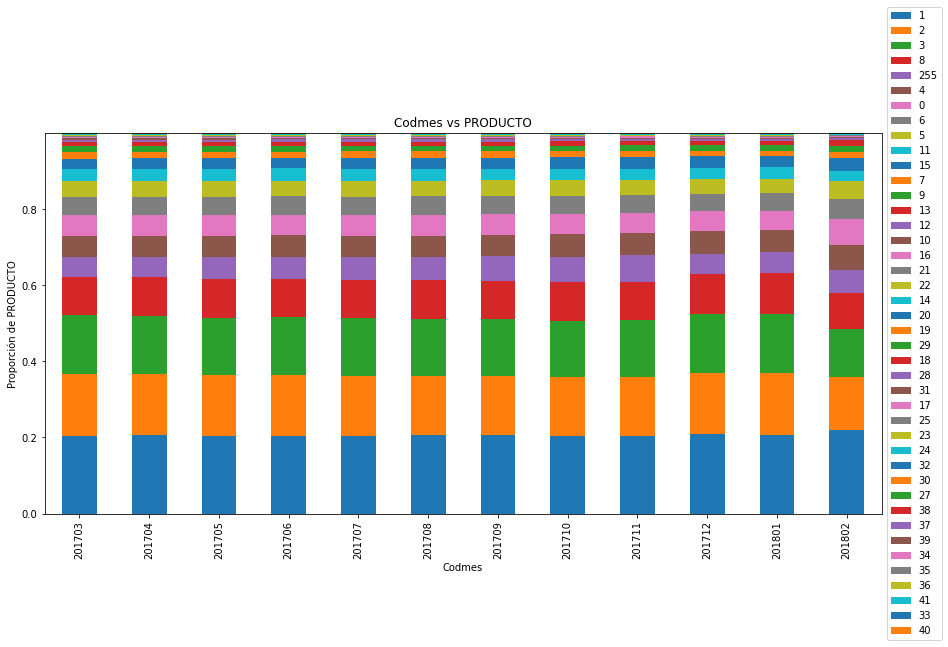

In [ ]:
#plot_cat_features_per_month(df_rcc_train, "cod_instit_financiera")
#plot_cat_features_per_month(df_rcc_train, "PRODUCTO")
#plot_cat_features_per_month(df_rcc_train, "RIESGO_DIRECTO")
#plot_cat_features_per_month(df_rcc_train, "COD_CLASIFICACION_DEUDOR")
#plot_cat_features_per_month(df_rcc_train, "condicion_cat")
plot_cat_features_per_month(df_rcc_train, "PRODUCTO")

In [ ]:
df_rcc_test["PRODUCTO"] = df_rcc_test["PRODUCTO"].fillna(255)
df_rcc_test["PRODUCTO"] = df_rcc_test["PRODUCTO"].astype(int)

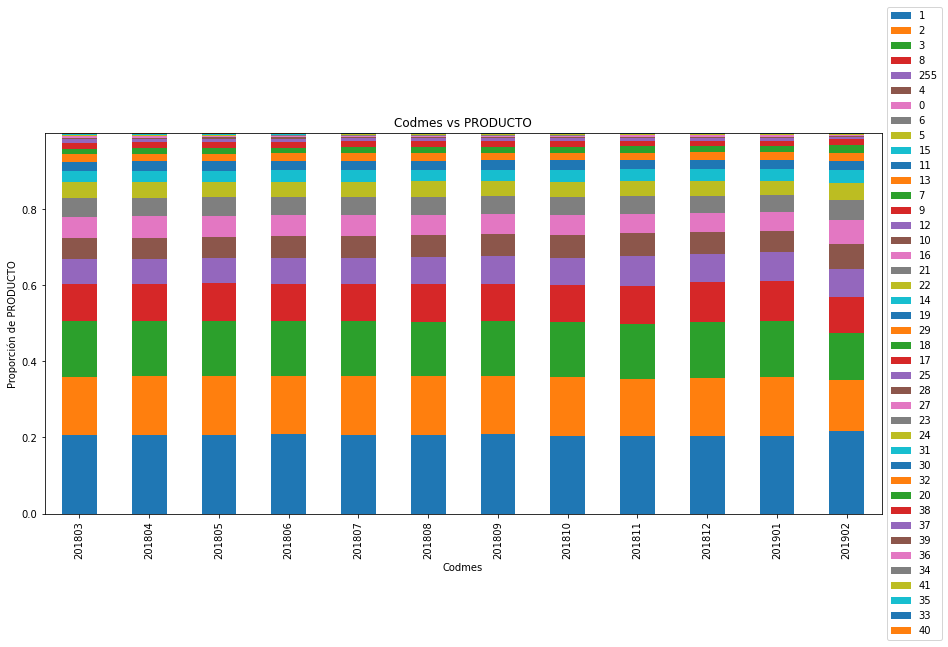

In [ ]:
plot_cat_features_per_month(df_rcc_test, "PRODUCTO")

In [ ]:
top_freq_products = [1, 2, 3, 8, 255, 4, 0, 6]
top_propensity_products = [12, 17, 18, 25, 20]
low_propensity_products = [32, 33, 35, 36, 37, 38, 40, 41]
list_product = top_freq_products + top_propensity_products + low_propensity_products
print(list_product)

[1, 2, 3, 8, 255, 4, 0, 6, 12, 17, 18, 25, 20, 32, 33, 35, 36, 37, 38, 40, 41]


In [ ]:
df_rcc_train["new_PRODUCTO"] = df_rcc_train["PRODUCTO"]
df_rcc_train.loc[df_rcc_train["PRODUCTO"].isin(top_propensity_products), "new_PRODUCTO"] = "TOP_PROPENSITY"
df_rcc_train.loc[df_rcc_train["PRODUCTO"].isin(low_propensity_products), "new_PRODUCTO"] = "LOW_PROPENSITY"
df_rcc_train.loc[~df_rcc_train["PRODUCTO"].isin(list_product), "new_PRODUCTO"] = "OTROS"

In [ ]:
df_rcc_test["new_PRODUCTO"] = df_rcc_test["PRODUCTO"]
df_rcc_test.loc[df_rcc_test["PRODUCTO"].isin(top_propensity_products), "new_PRODUCTO"] = "TOP_PROPENSITY"
df_rcc_test.loc[df_rcc_test["PRODUCTO"].isin(low_propensity_products), "new_PRODUCTO"] = "LOW_PROPENSITY"
df_rcc_test.loc[~df_rcc_test["PRODUCTO"].isin(list_product), "new_PRODUCTO"] = "OTROS"

In [ ]:
#df_rcc_train_1.groupby("codmes", as_index=False).agg({"target": "mean"}).sort_values(by="target", ascending=False)
df_rcc_train_1.groupby("new_PRODUCTO", as_index=False).agg({"target": ["mean", "count"]}).sort_values(by=("target", "mean"), ascending=False)

new_PRODUCTO    target         
                        mean    count
10  TOP_PROPENSITY  0.802512   232693
5                6  0.224332  1464031
4                4  0.195240  1750596
0                0  0.191279  1681760
9            OTROS  0.172569  4801030
1                1  0.153146  6286680
6                8  0.132459  3069968
7              255  0.129681  1813077
2                2  0.118798  4755886
3                3  0.112642  4535051
8   LOW_PROPENSITY  0.000000      854

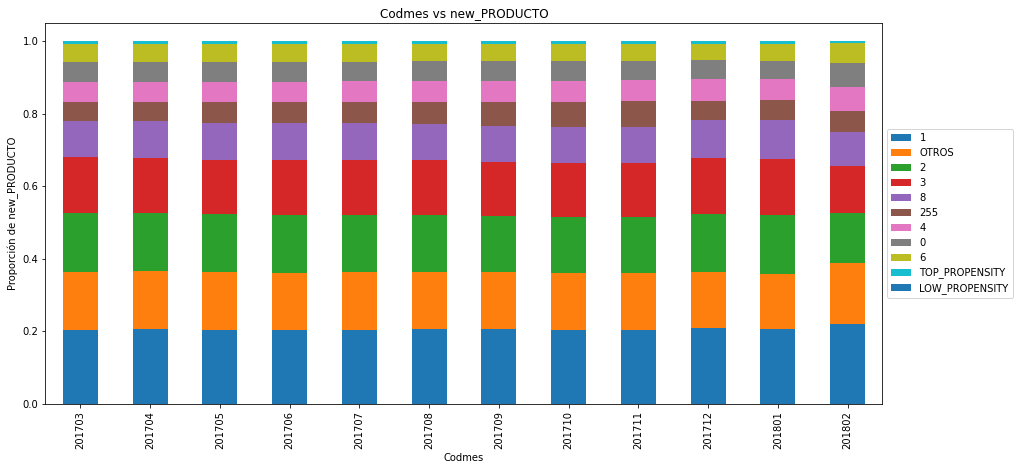

In [ ]:
plot_cat_features_per_month(df_rcc_train_1, "new_PRODUCTO")

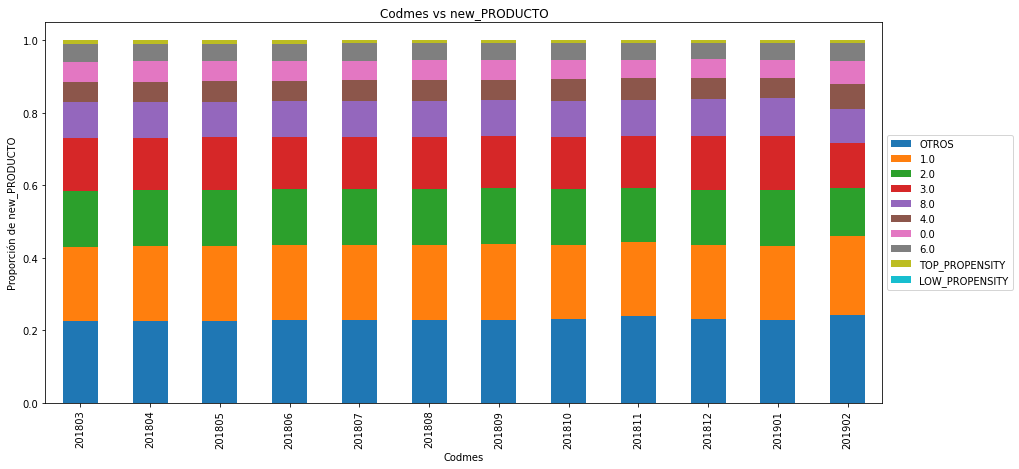

In [ ]:
plot_cat_features_per_month(df_rcc_test, "new_PRODUCTO")

In [ ]:
df_rcc_train.loc[df_rcc_train["PRODUCTO"] == 255]

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,new_PRODUCTO
12,201711,5,0,9,38,-0.072859,255,-1,0,255
15,201711,5,0,12,15,-0.072825,255,-1,0,255
32,201711,12,0,11,11,-0.072814,255,-1,0,255
74,201711,42,0,11,10,-0.072825,255,-1,0,255
79,201711,43,0,10,28,-0.072859,255,-1,0,255
...,...,...,...,...,...,...,...,...,...,...
30391584,201801,258755,0,13,1,0.322775,255,-1,0,255
30391587,201801,312963,0,11,0,-0.072232,255,-1,0,255
30391603,201801,258758,0,12,15,-0.072579,255,-1,0,255
30391611,201801,324411,0,12,1,-0.072814,255,-1,0,255


In [ ]:
[c for c in df_rcc_train["PRODUCTO"].unique().tolist() if c not in df_rcc_test["PRODUCTO"].unique().tolist()]

[255]

### Feature **Institucion Financiera**

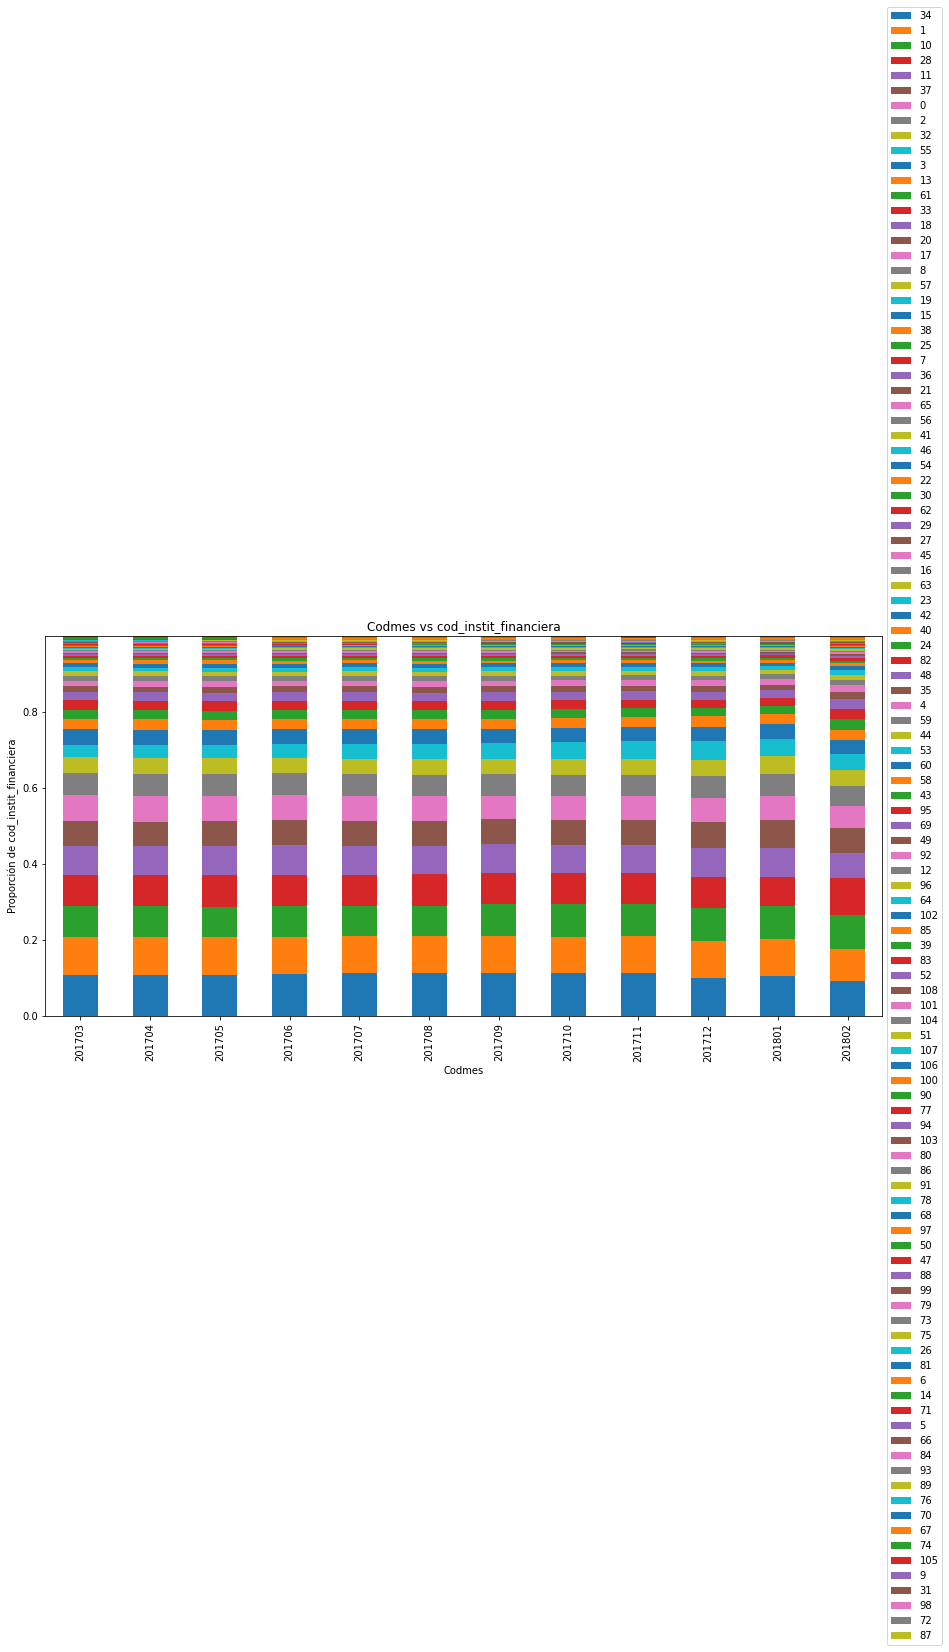

In [ ]:
plot_cat_features_per_month(df_rcc_train, "cod_instit_financiera")

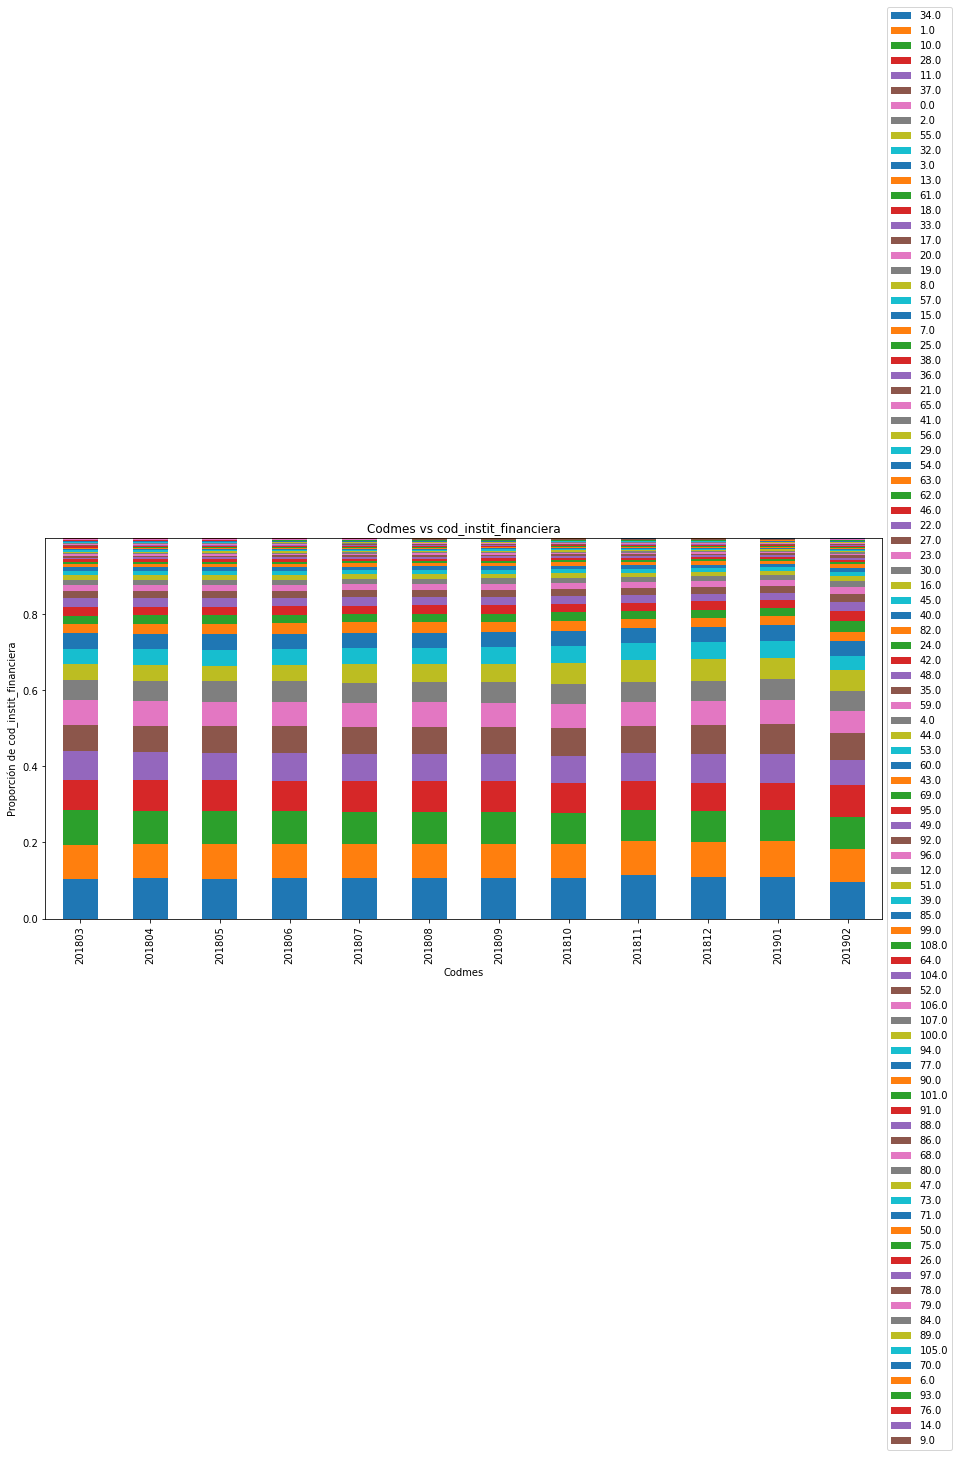

In [ ]:
plot_cat_features_per_month(df_rcc_test, "cod_instit_financiera")

In [ ]:
df_rcc_test[["cod_instit_financiera"]].info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34351754 entries, 0 to 34351753
Data columns (total 1 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   cod_instit_financiera  34351420 non-null  float32
dtypes: float32(1)
memory usage: 131.0 MB


In [ ]:
34351420-34351754

-334

In [ ]:
cod_instit_financiera_to_avoid = [58, 66, 102, 83, 103, 5, 81, 98, 67, 74, 31, 72, 87]
df_rcc_train.loc[df_rcc_train["cod_instit_financiera"].isin(cod_instit_financiera_to_avoid), "codmes"].unique()

array([201705, 201707, 201708, 201709, 201802, 201711, 201710, 201704,
       201703, 201706, 201712, 201801], dtype=uint32)

In [ ]:
df_tmp_agg = df_rcc_train_1.groupby("cod_instit_financiera", as_index=False).agg({"target": ["mean", "count"]}).sort_values(by=("target", "mean"), ascending=False)
print(df_tmp_agg.loc[df_tmp_agg[("target", "mean")] < 0.05, "cod_instit_financiera"].tolist())

[12, 67, 66, 87, 86, 98, 47, 14, 72, 78, 31, 81, 84]


In [ ]:
df_rcc_train_1["cod_instit_financiera"].nunique(), df_rcc_test["cod_instit_financiera"].nunique()

(109, 96)

In [ ]:
top_freq_instits = [34, 1, 10, 28, 11, 37, 0, 2]
top_propensity_instits = [9, 26, 89, 105, 99, 39, 97, 90, 108, 106, 107, 95, 49, 94, 100, 77, 91, 96, 6, 69, 104, 85, 70, 88, 93, 101, 75, 80, 73, 76, 52, 46, 68, 71, 92, 63, 60, 55, 65] # [74, 5]
low_propensity_instits = [12, 86, 47, 14, 78, 84] #[67, 66, 87, 98, 72, 31, 81]
list_instit = top_freq_instits + top_propensity_instits + low_propensity_instits
print(list_instit)

[34, 1, 10, 28, 11, 37, 0, 2, 9, 26, 89, 105, 99, 39, 97, 90, 108, 106, 107, 95, 49, 94, 100, 77, 91, 96, 6, 69, 104, 85, 70, 88, 93, 101, 75, 80, 73, 76, 52, 46, 68, 71, 92, 63, 60, 55, 65, 12, 86, 47, 14, 78, 84]


In [ ]:
df_rcc_train["new_cod_instit_financiera"] = df_rcc_train["cod_instit_financiera"]
df_rcc_train.loc[df_rcc_train["cod_instit_financiera"].isin(top_propensity_instits), "new_cod_instit_financiera"] = "TOP_PROPENSITY"
df_rcc_train.loc[df_rcc_train["cod_instit_financiera"].isin(low_propensity_instits), "new_cod_instit_financiera"] = "LOW_PROPENSITY"
df_rcc_train.loc[~df_rcc_train["cod_instit_financiera"].isin(list_instit), "new_cod_instit_financiera"] = "OTROS"

In [ ]:
df_rcc_test["new_cod_instit_financiera"] = df_rcc_test["cod_instit_financiera"]
df_rcc_test.loc[df_rcc_test["cod_instit_financiera"].isin(top_propensity_instits), "new_cod_instit_financiera"] = "TOP_PROPENSITY"
df_rcc_test.loc[df_rcc_test["cod_instit_financiera"].isin(low_propensity_instits), "new_cod_instit_financiera"] = "LOW_PROPENSITY"
df_rcc_test.loc[~df_rcc_test["cod_instit_financiera"].isin(list_instit), "new_cod_instit_financiera"] = "OTROS"

In [ ]:
df_rcc_train_1 = df_rcc_train.merge(df_y_train, how="left", on="key_value")

In [ ]:
df_rcc_train_1.groupby("new_cod_instit_financiera", as_index=False).agg({"target": ["mean", "count"]}).sort_values(by=("target", "mean"), ascending=False)

new_cod_instit_financiera    target         
                                  mean    count
10            TOP_PROPENSITY  0.376281  1547513
9                      OTROS  0.161742  9632572
7                         37  0.149385  2025437
5                         28  0.149028  2510486
3                         10  0.145239  2554443
1                          1  0.132197  2918938
6                         34  0.131867  3269181
4                         11  0.125560  2272979
0                          0  0.111038  1943112
2                          2  0.105804  1714186
8             LOW_PROPENSITY  0.013674     2779

### Feature **Condición**

In [ ]:
df_rcc_train["condicion_cat"] = df_rcc_train["condicion"].apply(lambda c: 0 if c == 0 else "00_03" if c < 90 else  "03_06" if c < 180 else "06_12" if c < 365 else "12-32" if c < 960 else ">32")

In [ ]:
df_rcc_train.groupby(["codmes", "condicion_cat"], as_index=False).agg({"key_value": ["count", "nunique"], "condicion": ["min", "max"]}).sort_values(by="codmes", ascending=False)

codmes condicion_cat key_value         condicion      
                             count nunique       min   max
71  201802           >32     13813   10386       960  9999
70  201802         12-32      6057    4492       365   959
69  201802         06_12      3755    2686       180   364
68  201802         03_06      4460    2340        90   179
67  201802         00_03     67490   24181         1    89
..     ...           ...       ...     ...       ...   ...
2   201703         03_06      2785    1843        90   179
1   201703         00_03     60389   22564         1    89
4   201703         12-32      7234    5233       365   959
5   201703           >32     13674   10582       960  9999
0   201703             0   2211888  266216         0     0

[72 rows x 6 columns]

In [ ]:
df_rcc_train.loc[df_rcc_train["condicion"] == 9999]

In [ ]:
df_se_train.loc[df_se_train["key_value"] == 319538]

### Feature **Producto**

In [ ]:
df_rcc_train_agg = df_rcc_train.groupby(["codmes", "key_value"], as_index=False).agg({"PRODUCTO": "count"})

In [ ]:
df_rcc_train_agg.groupby("codmes", as_index=False).agg({"PRODUCTO": ["min", "mean", "max"]})

codmes PRODUCTO              
                min      mean max
0   201703        1  8.478538  72
1   201704        1  8.544050  64
2   201705        1  8.534149  68
3   201706        1  8.601406  69
4   201707        1  8.596254  66
5   201708        1  8.617329  64
6   201709        1  8.718542  66
7   201710        1  8.682221  62
8   201711        1  8.718877  62
9   201712        1  8.644327  66
10  201801        1  8.827767  67
11  201802        1  9.069171  65

In [ ]:
df_rcc_train.groupby("codmes", as_index=False).agg({"key_value": ["count", "nunique"]}).sort_values(by="codmes", ascending=False)

codmes key_value        
               count nunique
11  201802   3251180  358487
10  201801   2599133  294427
9   201712   2549039  294880
8   201711   2582235  296166
7   201710   2551045  293824
6   201709   2524942  289606
5   201708   2475888  287315
4   201707   2444190  284332
3   201706   2407525  279899
2   201705   2365299  277157
1   201704   2341813  274087
0   201703   2299337  271195

In [ ]:
df_rcc_test.groupby("codmes", as_index=False).agg({"key_value": ["count", "nunique"]}).sort_values(by="codmes", ascending=False)

codmes key_value        
               count nunique
11  201902   3668504  396666
10  201901   2974453  326447
9   201812   2913266  327683
8   201811   2927965  329841
7   201810   2873164  327975
6   201809   2850795  323546
5   201808   2803200  321742
4   201807   2760481  319240
3   201806   2725859  314598
2   201805   2671249  311221
1   201804   2610643  307786
0   201803   2572175  304407

In [ ]:
df_rcc_all = pd.concat([df_rcc_train, df_rcc_test]).reset_index(drop=True)

In [ ]:
df_rcc_all.

Lista de Cambios:

*   Quitar a los registros con código de producto 255
*   Sumar 1 a los valores de la variable saldo
*   Quitar a los registros con códigos de instituciones financieras iguales a: 



## Dataset Producto

In [ ]:
df_productos = optimizar_df(pd.read_csv("[00] Data/productos.csv")).rename(columns={"Productos": "PRODUCTO", "Unnamed: 0": "DES_PRODUCTO"})

In [ ]:
df_productos

,DES_PRODUCTO,PRODUCTO
0,PRESTAMO PERSONAL,0
1,RENDIMIENTOS DEVENGADOS,1
2,LINEA TOTAL TC,2
3,LINEA TC NO UTILIZADA,3
4,PRESTAMOS MICRO EMPRESA,4
5,OTRAS GARANTIAS NO PREFERIDAS,5
6,PROVISIONES,6
7,LINEA PRESTAMOS NO UTILIZADA,7
8,TARJETAS COMPRAS,8
9,RESTO RD,9


## Dataset Sunat

In [ ]:
df_sunat_train = optimizar_df(pd.read_csv("[00] Data/sunat_train.csv")).drop_duplicates()
df_sunat_test = optimizar_df(pd.read_csv("[00] Data/sunat_test.csv")).drop_duplicates()

In [ ]:
df_sunat_train.head()

,key_value,tipcontribuyente,tippersona,ciiu,ubigeo,condiciondomicilio,estadocontribuyente,fecalta,fecbaja,codvia,codzona,contabilidad,facturacion,domiciliado,comercioexterior,cargorele,codentidadtributo,estadotributo
0,190597,9,0,178,442,0,0,-0.785832,NaN,0,0,6,11,0,1,635,8,2
1,162813,0,0,253,449,0,0,0.971584,NaN,20,0,6,11,0,1,635,8,2
2,190620,9,0,173,473,0,2,0.025283,-1.561407,11,0,6,11,0,1,635,8,2
3,43886,0,0,285,154,0,0,0.566027,NaN,11,3,6,11,0,1,635,8,2
4,255211,0,0,285,456,0,0,0.836399,NaN,11,3,6,11,0,1,635,8,2


In [ ]:
df_sunat_train.shape[0], df_sunat_train["key_value"].nunique()

(292479, 233866)

In [ ]:
df_sunat_train.groupby("key_value", as_index=False).agg({"tipcontribuyente": "count"}).sort_values(by="tipcontribuyente", ascending=False)

,key_value,tipcontribuyente
172663,262090,96
80409,121911,63
57921,87603,51
149929,227523,47
157189,238557,45
...,...,...
83372,126457,1
83373,126458,1
83376,126461,1
83377,126463,1


In [ ]:
df_sunat_train.loc[df_sunat_train["key_value"] == 121911]

,key_value,tipcontribuyente,tippersona,ciiu,ubigeo,condiciondomicilio,estadocontribuyente,fecalta,fecbaja,codvia,codzona,contabilidad,facturacion,domiciliado,comercioexterior,cargorele,codentidadtributo,estadotributo
111888,121911,0,0,236,455,0,0,0.971584,NaN,20,0,6,11,0,1,635,8,2
437282,121911,31,1,150,455,0,9,2.053072,NaN,0,0,10,11,1,2,47,6,0
446840,121911,31,1,150,455,0,0,1.512328,NaN,0,0,10,11,1,1,425,6,1
446842,121911,31,1,150,455,0,0,1.512328,NaN,0,0,10,11,1,1,425,6,0
446847,121911,31,1,150,455,0,0,1.512328,NaN,0,0,10,11,1,1,425,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370582,121911,18,1,244,455,0,0,1.106770,NaN,0,0,10,11,1,1,425,0,0
1370583,121911,18,1,244,455,0,0,1.106770,NaN,0,0,10,11,1,1,425,4,0
1370586,121911,18,1,244,455,0,0,1.106770,NaN,0,0,10,11,1,1,425,6,1
1370587,121911,18,1,244,455,0,0,1.106770,NaN,0,0,10,11,1,1,425,6,0


In [ ]:
df_sunat_test.head()

,key_value,tipcontribuyente,tippersona,ciiu,ubigeo,condiciondomicilio,estadocontribuyente,fecalta,fecbaja,codvia,codzona,contabilidad,facturacion,domiciliado,comercioexterior,cargorele,codentidadtributo,estadotributo
0,371518,9,0,49,1434,0,0,1.782700,NaN,11,3,6,11,0,1,635,8,2
1,69182,9,0,173,175,0,0,-0.785832,-1.810068,0,3,0,0,0,1,635,8,2
2,362150,0,0,285,998,0,0,1.782700,NaN,0,3,6,11,0,1,635,8,2
3,261628,0,0,285,1321,0,0,2.053072,NaN,20,3,8,14,0,1,635,8,2
4,362252,9,0,178,482,0,2,1.106770,NaN,0,3,6,11,0,1,635,8,2


In [ ]:
round(df_sunat_train[["fecalta"]].describe(), 3)

,fecalta
count,1441139.000
mean,0.000
std,0.998
min,-1.327
25%,-0.921
50%,-0.110
75%,0.836
max,2.188


In [ ]:
round(df_sunat_test[["fecalta"]].describe(), 3)

,fecalta
count,1660667.000
mean,-0.105
std,1.029
min,-1.327
25%,-1.191
50%,-0.380
75%,0.701
max,2.323


In [ ]:
pfe_sunat_train = ProfileReport(df_sunat_train, explorative=True)
pfe_sunat_test = ProfileReport(df_sunat_test, explorative=True)

In [ ]:
pfe_sunat_train.to_file("pfe_sunat_train.html")

In [ ]:
pfe_sunat_test.to_file("pfe_sunat_test.html")

In [ ]:
#files.download('pfe_sunat_train.html')
files.download('pfe_sunat_test.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Dataset Censo

In [81]:
df_censo_train = optimizar_df(pd.read_csv("[00] Data/censo_train.csv")).drop_duplicates()
df_censo_test = optimizar_df(pd.read_csv("[00] Data/censo_test.csv")).drop_duplicates()

In [93]:
df_censo_train_2 = df_y_train.merge(df_censo_train, how="left", on=["key_value"])
df_censo_test_2 = df_y_test.merge(df_censo_test, how="left", on=["key_value"])

### Numeric

In [ ]:
num_cols = ["lon_x", "lat_y", 
            "pob", "pob_a", "pob_b", "pob_c", "pob_d", "pob_e", 
            "hog", "a", "b", "c", "d", "e",
            "ing_a_18",
            "gas_ali_a_18", "gas_ves_a_18", "gas_alq_a_18", "gas_mue_a_18", "gas_sal_a_18", "gas_trans_a_18", "gas_esp_a_18", "gas_otrs_a_18",
            "ing_b_18", "gas_ali_b_18", "gas_ves_b_18", "gas_alq_b_18", "gas_mue_b_18", "gas_sal_b_18", "gas_trans_b_18", "gas_esp_b_18", "gas_otrs_b_18", "ing_c_18", "gas_ali_c_18", "gas_ves_c_18", "gas_alq_c_18", "gas_mue_c_18", "gas_sal_c_18", "gas_trans_c_18", "gas_esp_c_18", "gas_otrs_c_18", "ing_d_18", "gas_ali_d_18", "gas_ves_d_18", "gas_alq_d_18", "gas_mue_d_18", "gas_sal_d_18", "gas_trans_d_18", "gas_esp_d_18", "gas_otrs_d_18", "ing_e_18", "gas_ali_e_18", "gas_ves_e_18", "gas_alq_e_18", "gas_mue_e_18", "gas_sal_e_18", "gas_trans_e_18", "gas_esp_e_18", "gas_otrs_e_18", "ing_18", "g1_18", "g2_18", "g3_18", "g4_18", "g5_18", "g6_18", "g7_18", "g8_18"
            
            ]

### Categorical

In [ ]:
cat_cols = [
            "pred", 

            ]

### Dummy

In [100]:
dum_cols = [
            "zon_sis", "zon_der", "zon_inu", "zon_com"
            ]

In [99]:
df_censo_train_2.head(1).T.head(10)

,0
key_value,0.000000
target,0.000000
lon_x,-1.307895
lat_y,1.507949
zon_sis,-0.931515
zon_der,-0.242328
zon_inu,-0.327010
zon_com,-0.280674
score,-0.714361
pob,-0.042958


In [96]:
df_censo_train_2["lon_x"].nunique()

80530

In [86]:
df_y_train.shape

(358487, 2)

In [85]:
df_se_train_2.shape

(358487, 16)

In [84]:
df_censo_train.shape

(153139, 256)

In [87]:
153139/358487

0.42718145985767964

In [90]:
df_y_test.shape

(396666, 2)

In [88]:
df_censo_test.shape

(200499, 256)

In [91]:
200499 / 396666

0.5054605133790141

In [ ]:
-rw------- 1 root root 979M Jan 22 03:05 censo_test.csv
-rw------- 1 root root 748M Jan 22 03:05 censo_train.csv